# Exploratory Data Analysis

In [ ]:
# import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# initial data exploration

df_founders = pd.read_csv('people.csv')

print(df_founders.head())
print(df_founders.columns)

   id object_id first_name last_name   birthplace affiliation_name
0   1       p:2        Ben   Elowitz          NaN        Blue Nile
1   2       p:3      Kevin  Flaherty          NaN         Wetpaint
2   3       p:4       Raju   Vegesna          NaN             Zoho
3   4       p:5        Ian     Wenig          NaN             Zoho
4   5       p:6      Kevin      Rose  Redding, CA     i/o Ventures
Index(['id', 'object_id', 'first_name', 'last_name', 'birthplace',
       'affiliation_name'],
      dtype='object')


In [3]:
df_relations = pd.read_csv('relationships.csv')

print(df_relations.head())
print(df_relations.columns)

   id  relationship_id person_object_id relationship_object_id    start_at  \
0   1                1              p:2                    c:1         NaN   
1   2                2              p:3                    c:1         NaN   
2   3                3              p:4                    c:3         NaN   
3   4                4              p:5                    c:3  2006-03-01   
4   6                6              p:7                    c:4  2005-07-01   

       end_at  is_past  sequence                                title  \
0         NaN        0         8    Co-Founder/CEO/Board of Directors   
1         NaN        1    279242                         VP Marketing   
2         NaN        0         4                           Evangelist   
3  2009-12-01        1         4  Senior Director Strategic Alliances   
4  2010-04-05        1         1              Chief Executive Officer   

            created_at           updated_at  
0  2007-05-25 07:03:54  2013-06-03 09:58:46  


In [4]:
df_degree = pd.read_csv('degrees.csv')

print(df_degree.head())
print(df_degree.columns)

   id object_id degree_type                       subject  \
0   1    p:6117         MBA                           NaN   
1   2    p:6136          BA               English, French   
2   3    p:6136          MS            Mass Communication   
3   4    p:6005          MS           Internet Technology   
4   5    p:5832         BCS  Computer Science, Psychology   

                        institution graduated_at           created_at  \
0                               NaN          NaN  2008-02-19 03:17:36   
1  Washington University, St. Louis   1990-01-01  2008-02-19 17:58:31   
2                 Boston University   1992-01-01  2008-02-19 17:58:31   
3           University of Greenwich   2006-01-01  2008-02-19 23:40:40   
4                   Rice University          NaN  2008-02-20 05:28:09   

            updated_at  
0  2008-02-19 03:17:36  
1  2008-02-25 00:23:55  
2  2008-02-25 00:23:55  
3  2008-02-25 00:23:55  
4  2008-02-20 05:28:09  
Index(['id', 'object_id', 'degree_type', 'su

In [5]:
df_degree['degree_type'] = df_degree['degree_type'].str.upper()

filtered_df = df_degree[(df_degree['degree_type'].str.upper().isin(["BS", "MS","MBA","PHD"]))]

print(filtered_df.columns)

# Group by the filtered degree types
grouped_df = filtered_df.groupby('degree_type')

grouped_df.describe()

Index(['id', 'object_id', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at', 'updated_at'],
      dtype='object')


id                                                      \
               count          mean           std   min      25%      50%   
degree_type                                                                
BS           23425.0  52800.584760  31678.313823   6.0  24733.0  51577.0   
MBA          15342.0  56113.868335  32125.100013   1.0  28152.0  57083.5   
MS           11715.0  53969.997610  31887.806560   3.0  24896.5  53417.0   
PHD           4061.0  57837.059837  31343.474412  16.0  31965.0  61374.0   

                                 
                  75%       max  
degree_type                      
BS           81108.00  109598.0  
MBA          84013.25  109600.0  
MS           83231.00  109493.0  
PHD          85215.00  109608.0

In [6]:
# Convert degree_type to uppercase
df_degree['degree_type'] = df_degree['degree_type'].str.upper()

# Create a list of the degree types you want to filter
valid_degree_types = ["BS", "MS", "PHD"]

# Create a new column to store recategorized degree types
df_degree['recategorized_degree_type'] = df_degree['degree_type']

# Replace degree types not in the valid list with "Others"
df_degree.loc[~df_degree['degree_type'].isin(valid_degree_types), 'recategorized_degree_type'] = 'Others'

print(df_degree.columns)

# Group by the recategorized degree types
grouped_df = df_degree.groupby('recategorized_degree_type')

# Describe the grouped data
print(grouped_df.describe())

Index(['id', 'object_id', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at', 'updated_at',
       'recategorized_degree_type'],
      dtype='object')
                                id                                             \
                             count          mean           std   min      25%   
recategorized_degree_type                                                       
BS                         23425.0  52800.584760  31678.313823   6.0  24733.0   
MS                         11715.0  53969.997610  31887.806560   3.0  24896.5   
Others                     70409.0  55436.696090  31568.668351   1.0  28461.0   
PHD                         4061.0  57837.059837  31343.474412  16.0  31965.0   

                                                       
                               50%      75%       max  
recategorized_degree_type                              
BS                         51577.0  81108.0  109598.0  
MS                         5341

In [7]:
# Drop rows with NaN values in the 'birthplace' column
df_founders = df_founders.dropna(subset=['birthplace'])

In [8]:
# Count of Founders from Each Birthplace
birthplace_counts = df_founders['birthplace'].value_counts()
print("Count of Founders from Each Birthplace:")
print(birthplace_counts)

Count of Founders from Each Birthplace:
birthplace
India            660
New York         591
London           435
USA              381
United States    339
                ... 
Nerburryport       1
Jharsuguda         1
Rockport, MA       1
arkansas           1
Perry, Ohio        1
Name: count, Length: 8270, dtype: int64


In [9]:
# Top N Birthplaces
top_n = 5  # You can change this to any desired number
top_birthplaces = df_founders['birthplace'].value_counts().head(top_n)
print(f"\nTop {top_n} Birthplaces:")
print(top_birthplaces)


Top 5 Birthplaces:
birthplace
India            660
New York         591
London           435
USA              381
United States    339
Name: count, dtype: int64


In [10]:
# Merge the dataframes on 'person_object_id' and 'id'
merged_degree_df = pd.merge(df_founders, filtered_df, left_on='object_id', right_on='object_id')

merged_degree_df_with_all_degree_types = pd.merge(df_founders, df_degree, left_on='object_id', right_on='object_id')

# Display the merged data frame
print("Merged Dataframe:")
print(merged_degree_df_with_all_degree_types.head())
print(merged_degree_df_with_all_degree_types.columns)

Merged Dataframe:
   id_x object_id first_name  last_name       birthplace affiliation_name  \
0     5       p:6      Kevin       Rose      Redding, CA     i/o Ventures   
1     5       p:6      Kevin       Rose      Redding, CA     i/o Ventures   
2     6       p:7        Jay    Adelson      Detroit, MI             Digg   
3    10      p:11     Dustin  Moskovitz  Gainesville, FL         Facebook   
4    22      p:24      Alice  Lankester  Surrey, England            Apple   

    id_y degree_type                                            subject  \
0  15624         NaN                                                NaN   
1  69509         NaN                                                NaN   
2  22649         NaN  Film and Broadcasting, Computer Science Concen...   
3  13476   NO DEGREE                                                NaN   
4  46696          BA                           History, Decorative Arts   

                       institution graduated_at           created_at

recategorized_degree_type
Others    70409
BS        23425
MS        11715
PHD        4061
Name: count, dtype: int64


/var/folders/6h/ffmbfjdn44zcykwfmj81wnlm0000gn/T/ipykernel_68864/2305461775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degree_type_counts.index, y=degree_type_counts.values, palette="viridis")


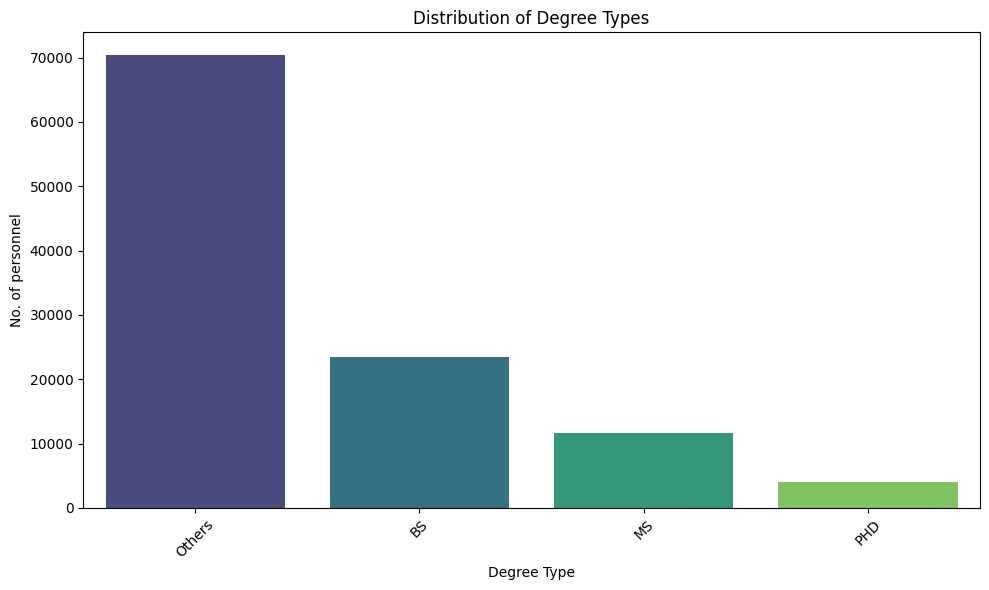

In [11]:
degree_type_counts = df_degree['recategorized_degree_type'].value_counts()

print(degree_type_counts)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=degree_type_counts.index, y=degree_type_counts.values, palette="viridis")
plt.title('Distribution of Degree Types')
plt.xlabel('Degree Type')
plt.ylabel('No. of personnel')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()
plt.show()


In [18]:
# Define Ivy League colleges
ivy_league_colleges = ['Harvard University', 'Yale University', 'Princeton University', 'Columbia University', 'University of Pennsylvania', 'Brown University', 'Dartmouth College', 'Cornell University']

# Filter the merged DataFrame to include only Ivy League colleges
ivy_league_df = merged_degree_df[merged_degree_df['institution'].isin(ivy_league_colleges)]

# Count the number of people from Ivy League colleges
num_people_from_ivy_league = len(ivy_league_df)

print("Number of people from Ivy League colleges:", num_people_from_ivy_league)


Number of people from Ivy League colleges: 267


In [19]:
# Define Ivy League colleges
ivy_league_colleges = ['Harvard University', 'Yale University', 'Princeton University', 'Columbia University', 'University of Pennsylvania', 'Brown University', 'Dartmouth College', 'Cornell University']

# Create a DataFrame for non-Ivy League colleges
non_ivy_league_df = merged_degree_df[~merged_degree_df['institution'].isin(ivy_league_colleges)]

# Calculate the total number of people in the merged DataFrame
total_people = len(merged_degree_df)

# Calculate the number of people from Ivy League colleges
num_people_from_ivy_league = len(ivy_league_df)

# Calculate the number of people from non-Ivy League colleges
num_people_from_non_ivy_league = len(non_ivy_league_df)


print("People from Ivy League colleges:",num_people_from_ivy_league)
print("People from non-Ivy League colleges:",num_people_from_non_ivy_league)


# Calculate the proportion of people from Ivy League colleges
proportion_from_ivy_league = num_people_from_ivy_league / total_people

# Calculate the proportion of people from non-Ivy League colleges
proportion_from_non_ivy_league = num_people_from_non_ivy_league / total_people

print("\nProportion of people from Ivy League colleges:", proportion_from_ivy_league)
print("Proportion of people from non-Ivy League colleges:", proportion_from_non_ivy_league)

People from Ivy League colleges: 267
People from non-Ivy League colleges: 8398

Proportion of people from Ivy League colleges: 0.030813618003462204
Proportion of people from non-Ivy League colleges: 0.9691863819965378


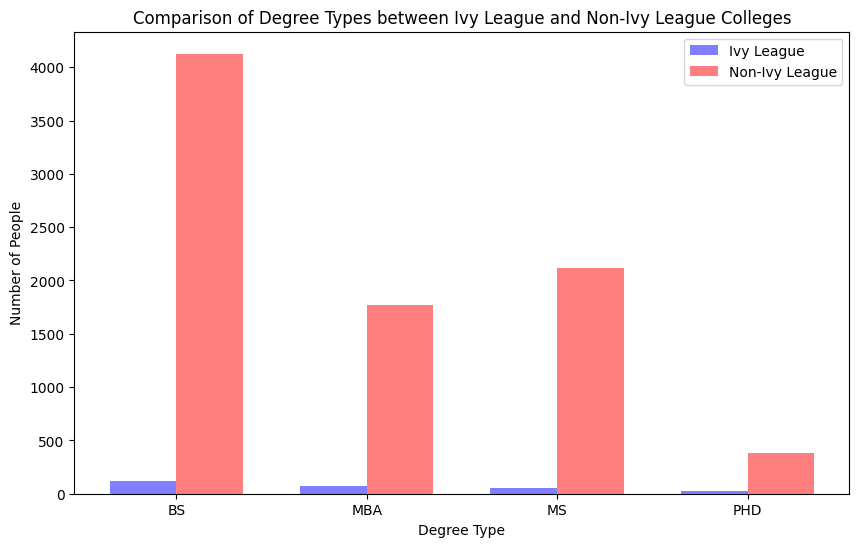

In [20]:
# Get degree type counts for Ivy League and non-Ivy League colleges
ivy_degree_counts = ivy_league_df['degree_type'].value_counts()
non_ivy_degree_counts = non_ivy_league_df['degree_type'].value_counts()

# Get unique degree types
unique_degree_types = sorted(set(ivy_degree_counts.index) | set(non_ivy_degree_counts.index))

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = range(len(unique_degree_types))
r2 = [x + bar_width for x in r1]

# Plot the data differentiated by degree type
plt.figure(figsize=(10, 6))
plt.bar(r1, ivy_degree_counts.reindex(unique_degree_types, fill_value=0), color='blue', width=bar_width, alpha=0.5, label='Ivy League')
plt.bar(r2, non_ivy_degree_counts.reindex(unique_degree_types, fill_value=0), color='red', width=bar_width, alpha=0.5, label='Non-Ivy League')

# Add labels and title
plt.xlabel('Degree Type')
plt.ylabel('Number of People')
plt.title('Comparison of Degree Types between Ivy League and Non-Ivy League Colleges')
plt.xticks([r + bar_width/2 for r in range(len(unique_degree_types))], unique_degree_types)
plt.legend()

plt.show()


In [ ]:
# Add a new column to check the graduation year
merged_degree_df['graduation_year'] = pd.to_datetime(merged_degree_df['graduated_at']).dt.year

# Define time groups for graduation years
time_groups = [1980, 1990, 2000, 2010, 2020, 2030]  # Modify as needed

# Add a new column to categorize graduation years into time groups
merged_degree_df['graduation_time_group'] = pd.cut(merged_degree_df['graduation_year'], bins=time_groups, labels=['< 1980', '1980-1989', '1990-1999', '2000-2009', '2010-2019'])

# Now you can use this DataFrame for further analysis or visualization

import matplotlib.pyplot as plt

# Count the number of graduates in each time group
time_group_counts = merged_degree_df['graduation_time_group'].value_counts().sort_index()

# Plotting the data
plt.figure(figsize=(10, 6))
time_group_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Graduation Time Group')
plt.ylabel('Number of Pesonnels')
plt.title('Distribution of Graduates Across Time Groups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [15]:
# merged_df.columns

merged_degree_df.columns

Index(['id_x', 'object_id', 'first_name', 'last_name', 'birthplace',
       'affiliation_name', 'id_y', 'degree_type', 'subject', 'institution',
       'graduated_at', 'created_at', 'updated_at', 'graduation_year',
       'graduation_time_group'],
      dtype='object')

In [21]:
df_cleaned = pd.read_csv("cleaned_investments_VC_Industry.csv")

df_cleaned.columns

Index(['name', 'market', 'funding_total_usd', 'status', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at', 'seed',
       'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H', 'country', 'age', 'success_metric_updated', 'Industry'],
      dtype='object')

# Creating filtered CSV file 

In [17]:
# Merge the DataFrames
df_merged_cleaned = pd.merge(merged_degree_df_with_all_degree_types, df_cleaned, left_on='affiliation_name', right_on='name')

counts = df_merged_cleaned.groupby('degree_type').size().reset_index(name='counts')
print(counts)


stem_degrees = ['BS', 'MS', 'PHD', 'BE', 'BACHELORS IN SCIENCE', 'BTECH', 
                'B.S.C. PHOTO-JOURNALISM, RADIO T', 'S.M. AND S.B.', 'ENGINEER',
                'BACHELOR OF SCIENCE IN ENGINEERI', "DIPLOME D'INGENIEUR", 'BACHELOR OF SCIENCE MARKETING',
                'BSC. (HONS) II.I', 'BACHELOR OF SCIENCE - GAME ART &', 'B.S. WITH HONORS AND DISTINCTION', 
                'ENGINEERING DEGREE', 'CS&E', 'BS, MS', 'COMPUTER ENGINEERING', 'PHD IN PHYSICS',
                "BACHELOR'S DEGREE IN COMPUTER SC", 'BS WITH HONORS', 'S.B.', 'BACHELORS OF SCIENCE', 'BS IN CS', 
                'B.S. ELECTRICAL & COMPUTER ENGIN', 'BACHELORS IN SCIENCE AND COMMERC', 'DUAL (B.TECH, M.TECH)',
                'SB', 'BACHELORS OF SCIENCE IN MANAGEME', 'FIRST CLASS B.ENG. WITH HONORS', 'ENGINEERING',
                'BACHELOR OF LAWS', "BACHELOR'S OF COMPUTER SCIENCE", 'BACHELOR OF APPLIED SCIENCE WITH', 
                'M.SC.(TECH.)', 'MASTER OF ENGINEERING', 'M.SC (TECH)', 'MSC IN ELECTRICAL ENGINEERING', 
                'MENG (DROP-OUT)', 'MASTER OF SCIENCE IN ENGINEERING', 'BACHELOR IN TECHNOLOGY',
                'B. MATH (HON.)', 'ENGINEERING (HONS2A)', 'S.B.E', 'MANAGEMENT SCIENCE AND ENGINEERI',
                'ENGENEER', 'B. SCI', 'ELECTRICAL ENGINEERING', 'MASTERS IN COMPUTER SCIENCE', 
                'MSC. ENGINEERING', 'MENG', 'COMPUTER PROGRAMMER/ANALYST', 'BACHELOR OF SCIENCE (BS)',
                'B.SC. 2:1', 'BSEE WITH HONORS', 'BSCE', 'CS', 'BACHELOR OF ENGINEERING',
                'BACHELOR  WITH HONOURS', 'M.SC. (ECON.)', 'BACHELOR OF SCIENCE IN BUSINESS ',
                'B. SC.WITH HONORS', 'BACHELOR OF SCIENCE', 'M. ENG. SC.', 'B.S. COMPUTER ENGINEERING',
                'M.SC. (ECON)', 'SCIENTIÆ BACCALAUREUS', 'B.ARCH', 'MSCE', 'MASTERS IN SCIENCE', 'B.C.',
                'DOKTOR DER INGENIEURWISSENSCHAFT', 'APPLIED SCIENCE', 'B. MATH (HONORS)', 'B.SC (HONOURS)',
                'M.TECH.', 'TELECOM & ELECTRONICS ENGINEER', 'MATH/COMPUTER SCIENCE', 'BACHELOR DEGREES OF SCIENCE', 
                'BACHELOR OF SCIENCE', 'BACHELOR OF SCIENCE - APPLIED MA', 'HONOURS BACHELOR OF SCIENCE', 
                'BS IN BUSINESS ADMINISTRATION', 'BS IN COMPUTER SCIENCE', 'MASTER SCIENCE', 'TELECOM ENGINEER', 
                "ENGINEER'S DEGREE", 'BACHELOR OF COMPUTER APPLICATION', 'BACHELOR OF ECONOMICS',
                'BACHELOR IN COMPUTING', 'BACHELOR AND MASTER', 'MSC ENGINEERING', 'BACHELORS IN COMPUTER SCIENCE.',
                'PH.D. AND AN M.S.', 'BSC (ENG) (ELEC)']


# Drop duplicate rows based on 'id_x' column
filtered_df_cleaned = df_merged_cleaned.drop_duplicates(subset=['id_x']).sort_values(['affiliation_name'])


list_of_unique_majors = filtered_df_cleaned['degree_type'].unique()

print(list_of_unique_majors)

filtered_df_cleaned['degree_type'] = filtered_df_cleaned['degree_type'].apply(lambda x: x if x in stem_degrees else 'Other')

list_of_unique_majors = filtered_df_cleaned['degree_type'].unique()

print(list_of_unique_majors)

degree_type_counts = filtered_df_cleaned['degree_type'].value_counts()

print(degree_type_counts)


# Create a dictionary to map degree types to categories
degree_categories = {
    'BS': 'Bachelors in STEM',
    'MS': 'Masters in STEM',
    'PHD': 'PhD',
    'BE': 'Bachelors in STEM',
    'BACHELORS IN SCIENCE': 'Bachelors in STEM',
    'BTECH': 'Bachelors in STEM',
    'B.S.C. PHOTO-JOURNALISM, RADIO T': 'Bachelors in STEM',
    'S.M. AND S.B.': 'Masters in STEM',
    'BACHELOR  WITH HONOURS': 'Bachelors in STEM',
    'ENGINEER': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE IN ENGINEERI': 'Bachelors in STEM',
    "DIPLOME D'INGENIEUR": 'Bachelors in STEM',
    'BACHELOR OF SCIENCE MARKETING': 'Bachelors in STEM',
    'BSC. (HONS) II.I': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE - GAME ART &': 'Bachelors in STEM',
    'B.S. WITH HONORS AND DISTINCTION': 'Bachelors in STEM',
    'ENGINEERING DEGREE': 'Bachelors in STEM',
    'CS&E': 'Bachelors in STEM',
    'BS, MS': 'Bachelors in STEM',
    'COMPUTER ENGINEERING': 'Bachelors in STEM',
    'PHD IN PHYSICS': 'PhD',
    "BACHELOR'S DEGREE IN COMPUTER SC": 'Bachelors in STEM',
    'BS WITH HONORS': 'Bachelors in STEM',
    'S.B.': 'Bachelors in STEM',
    'BACHELORS OF SCIENCE': 'Bachelors in STEM',
    'BS IN CS': 'Bachelors in STEM',
    'B.S. ELECTRICAL & COMPUTER ENGIN': 'Bachelors in STEM',
    'BACHELORS IN SCIENCE AND COMMERC': 'Bachelors in STEM',
    'DUAL (B.TECH, M.TECH)': 'Bachelors in STEM',
    'SB': 'Bachelors in STEM',
    'BACHELORS OF SCIENCE IN MANAGEME': 'Bachelors in STEM',
    'FIRST CLASS B.ENG. WITH HONORS': 'Bachelors in STEM',
    'ENGINEERING': 'Bachelors in STEM',
    'BACHELOR OF LAWS': 'Bachelors in STEM',
    "BACHELOR'S OF COMPUTER SCIENCE": 'Bachelors in STEM',
    'BACHELOR OF APPLIED SCIENCE WITH': 'Bachelors in STEM',
    'M.SC.(TECH.)': 'Masters in STEM',
    'MASTER OF ENGINEERING': 'Masters in STEM',
    'M.SC (TECH)': 'Masters in STEM',
    'MSC IN ELECTRICAL ENGINEERING': 'Masters in STEM',
    'MENG (DROP-OUT)': 'Masters in STEM',
    'MASTER OF SCIENCE IN ENGINEERING': 'Masters in STEM',
    'BACHELOR IN TECHNOLOGY': 'Bachelors in STEM',
    'B. MATH (HON.)': 'Bachelors in STEM',
    'ENGINEERING (HONS2A)': 'Bachelors in STEM',
    'S.B.E': 'Bachelors in STEM',
    'MANAGEMENT SCIENCE AND ENGINEERI': 'Bachelors in STEM',
    'ENGENEER': 'Bachelors in STEM',
    'B. SCI': 'Bachelors in STEM',
    'ELECTRICAL ENGINEERING': 'Bachelors in STEM',
    'MASTERS IN COMPUTER SCIENCE': 'Masters in STEM',
    'MSC. ENGINEERING': 'Masters in STEM',
    'MENG': 'Masters in STEM',
    'COMPUTER PROGRAMMER/ANALYST': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE (BS)': 'Bachelors in STEM',
    'B.SC. 2:1': 'Bachelors in STEM',
    'BSEE WITH HONORS': 'Bachelors in STEM',
    'BSCE': 'Bachelors in STEM',
    'CS': 'Bachelors in STEM',
    'BACHELOR OF ENGINEERING': 'Bachelors in STEM',
    'BACHELOR WITH HONOURS': 'Bachelors in STEM',
    'M.SC. (ECON.)': 'Masters in STEM',
    'BACHELOR OF SCIENCE IN BUSINESS ': 'Bachelors in STEM',
    'B. SC.WITH HONORS': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE': 'Bachelors in STEM',
    'M. ENG. SC.': 'Masters in STEM',
    'B.S. COMPUTER ENGINEERING': 'Bachelors in STEM',
    'M.SC. (ECON)': 'Masters in STEM',
    'SCIENTIÆ BACCALAUREUS': 'Bachelors in STEM',
    'B.ARCH': 'Bachelors in STEM',
    'MSCE': 'Masters in STEM',
    'MASTERS IN SCIENCE': 'Masters in STEM',
    'B.C.': 'Bachelors in STEM',
    'DOKTOR DER INGENIEURWISSENSCHAFT': 'PhD',
    'APPLIED SCIENCE': 'Bachelors in STEM',
    'B. MATH (HONORS)': 'Bachelors in STEM',
    'B.SC (HONOURS)': 'Bachelors in STEM',
    'M.TECH.': 'Masters in STEM',
    'TELECOM & ELECTRONICS ENGINEER': 'Bachelors in STEM',
    'MATH/COMPUTER SCIENCE': 'Bachelors in STEM',
    'BACHELOR DEGREES OF SCIENCE': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE': 'Bachelors in STEM',
    'BACHELOR OF SCIENCE - APPLIED MA': 'Bachelors in STEM',
    'HONOURS BACHELOR OF SCIENCE': 'Bachelors in STEM',
    'BS IN BUSINESS ADMINISTRATION': 'Bachelors in STEM',
    'BS IN COMPUTER SCIENCE': 'Bachelors in STEM',
    'MASTER SCIENCE': 'Masters in STEM',
    'TELECOM ENGINEER': 'Bachelors in STEM',
    "ENGINEER'S DEGREE": 'Bachelors in STEM',
    'BACHELOR OF COMPUTER APPLICATION': 'Bachelors in STEM',
    'BACHELOR OF ECONOMICS': 'Bachelors in STEM',
    'BACHELOR IN COMPUTING': 'Bachelors in STEM',
    'BACHELOR AND MASTER': 'Bachelors in STEM',
    'MSC ENGINEERING': 'Masters in STEM',
    'BACHELORS IN COMPUTER SCIENCE.': 'Bachelors in STEM',
    'PH.D. AND AN M.S.': 'PhD',
    'BSC (ENG) (ELEC)': 'Bachelors in STEM'
}



# Apply the mapping to create a new column 'degree_category'
filtered_df_cleaned['degree_category'] = filtered_df_cleaned['degree_type'].map(degree_categories).fillna(filtered_df_cleaned['degree_type'])

# Count the occurrences of each degree category
degree_category_counts = filtered_df_cleaned['degree_category'].value_counts()

filtered_df_cleaned.to_csv('new_filtered.csv', index=False)

                          degree_type  counts
0                      1-YEAR PROGRAM       1
1                                 2.2       1
2            5 YEAR DEGREE ( MASTER )       1
3                             5 YEARS       1
4           5 YEARS UNIVERSITY DEGREE       1
..                                ...     ...
467  TRILINGUAL INTERNATIONAL BACCALA       1
468                         UNDERGRAD       1
469                                UX       1
470                               VCE       1
471       VISUAL COMMUNICATION DESIGN       1

[472 rows x 2 columns]
['BA' 'BS' 'MBA WITH HONORS' 'BFA' 'BA, MARKETING & BUSINESS LAW' nan
 'MBA' 'ASSOCIATE ARTS' 'DOUBLE BACHELOR' 'MS' 'BBA' 'MA' 'PGDMA'
 'NATIONAL DIPLOMA' 'BACHELOR OF ART' 'PHD' 'BE' 'B' 'BACHLORS'
 'CERTIFICATE' 'MPA' 'DIPLOMA' 'DEGREE' 'JD' 'BTECH'
 'BACHELORS IN SCIENCE' 'AA' 'LLB' 'MARCH I' 'HIGHER SECONDRY SCHOOL'
 'FULL TIME' 'B.S.C. PHOTO-JOURNALISM, RADIO T' 'DOCTOR OF LAW (JD)'
 'BA (HONS)' 'SACHELORS' 'J.D./L